# Importing

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
!pip install scikit-plot
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D # deep learning techniques
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Outline

**1) The first 5 lines in data**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/BANGKIT/projek/mental_health.csv')
data.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [ ]:
!pip install googletrans==3.1.0a0
# Function to translate text from English to Indonesian
from googletrans import Translator

# init the Google API translator
def translate_to_indonesian(text):
    translator = Translator()
    try:
        # use translator.translate() function to translate text
        translation = translator.translate(text, src='en', dest='id')
        # return the translated text
        return translation.text
    except Exception as e:
        # return an error message if there's an error in translation
        return "Error translating text: {}".format(str(e))
# init the Google API translator
translator = Translator()

# set the timeout parameter to 10 seconds
translation = translator.translate('Hello, world!', src='en', dest='id', timeout=10)

# print the translated text
print(translation.text)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=b6cf3b0584ce92e2a8c6e5c15df706d1086273218a97351899077f1e757bc1b6
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

Halo Dunia!


In [ ]:
# import pandas library
import pandas as pd

# Apply the translation function to the 'text' column
data['text_indo'] = data['text'].apply(translate_to_indonesian)

# Save the translated DataFrame to a CSV file
data.to_csv('data_terjemahan.csv', index=False)

# Display the DataFrame to check the results
print(data[['text', 'text_indo']])

In [4]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/BANGKIT/projek/data_terjemahan.csv")

**2) Data shape**

In [5]:
print(data.shape)

(27977, 3)


**3) Null in data**

In [6]:
data.isnull().sum()

text         0
label        0
text_indo    0
dtype: int64

In [7]:
# Check for duplicates in the 'text' column
duplicates = data['text_indo'].duplicated()

# Count duplicates
num_duplicates = duplicates.sum()
num_duplicates

9

In [8]:
# Remove duplicates based on the 'text' column
data = data.drop_duplicates(subset='text')

In [9]:
data

,text,label,text_indo
0,dear american teens question dutch person hear...,0,remaja amerika yang terhormat pertanyaan orang...
1,nothing look forward lifei dont many reasons k...,1,tak ada harapan hidup tak banyak alasan terus ...
2,music recommendations im looking expand playli...,0,rekomendasi musik yang saya cari perluas dafta...
3,im done trying feel betterthe reason im still ...,1,aku sudah selesai mencoba merasa lebih baik al...
4,worried year old girl subject domestic physic...,1,khawatir gadis berusia tahun subjek fisik ruma...
...,...,...,...
27972,posting everyday people stop caring religion ...,0,memposting setiap hari orang berhenti peduli a...
27973,okay definetly need hear guys opinion ive pret...,0,oke pasti perlu mendengar pendapat teman-teman...
27974,cant get dog think ill kill myselfthe last thi...,1,tidak bisa mendapatkan anjing pikir aku akan b...
27975,whats point princess bridei really think like ...,1,apa gunanya putri pengantin aku benar-benar be...


**4) The number by labels**

In [10]:
data['label'].value_counts()

label
0    14134
1    13838
Name: count, dtype: int64

**5) Bar and Pie plot by '0' and '1'**

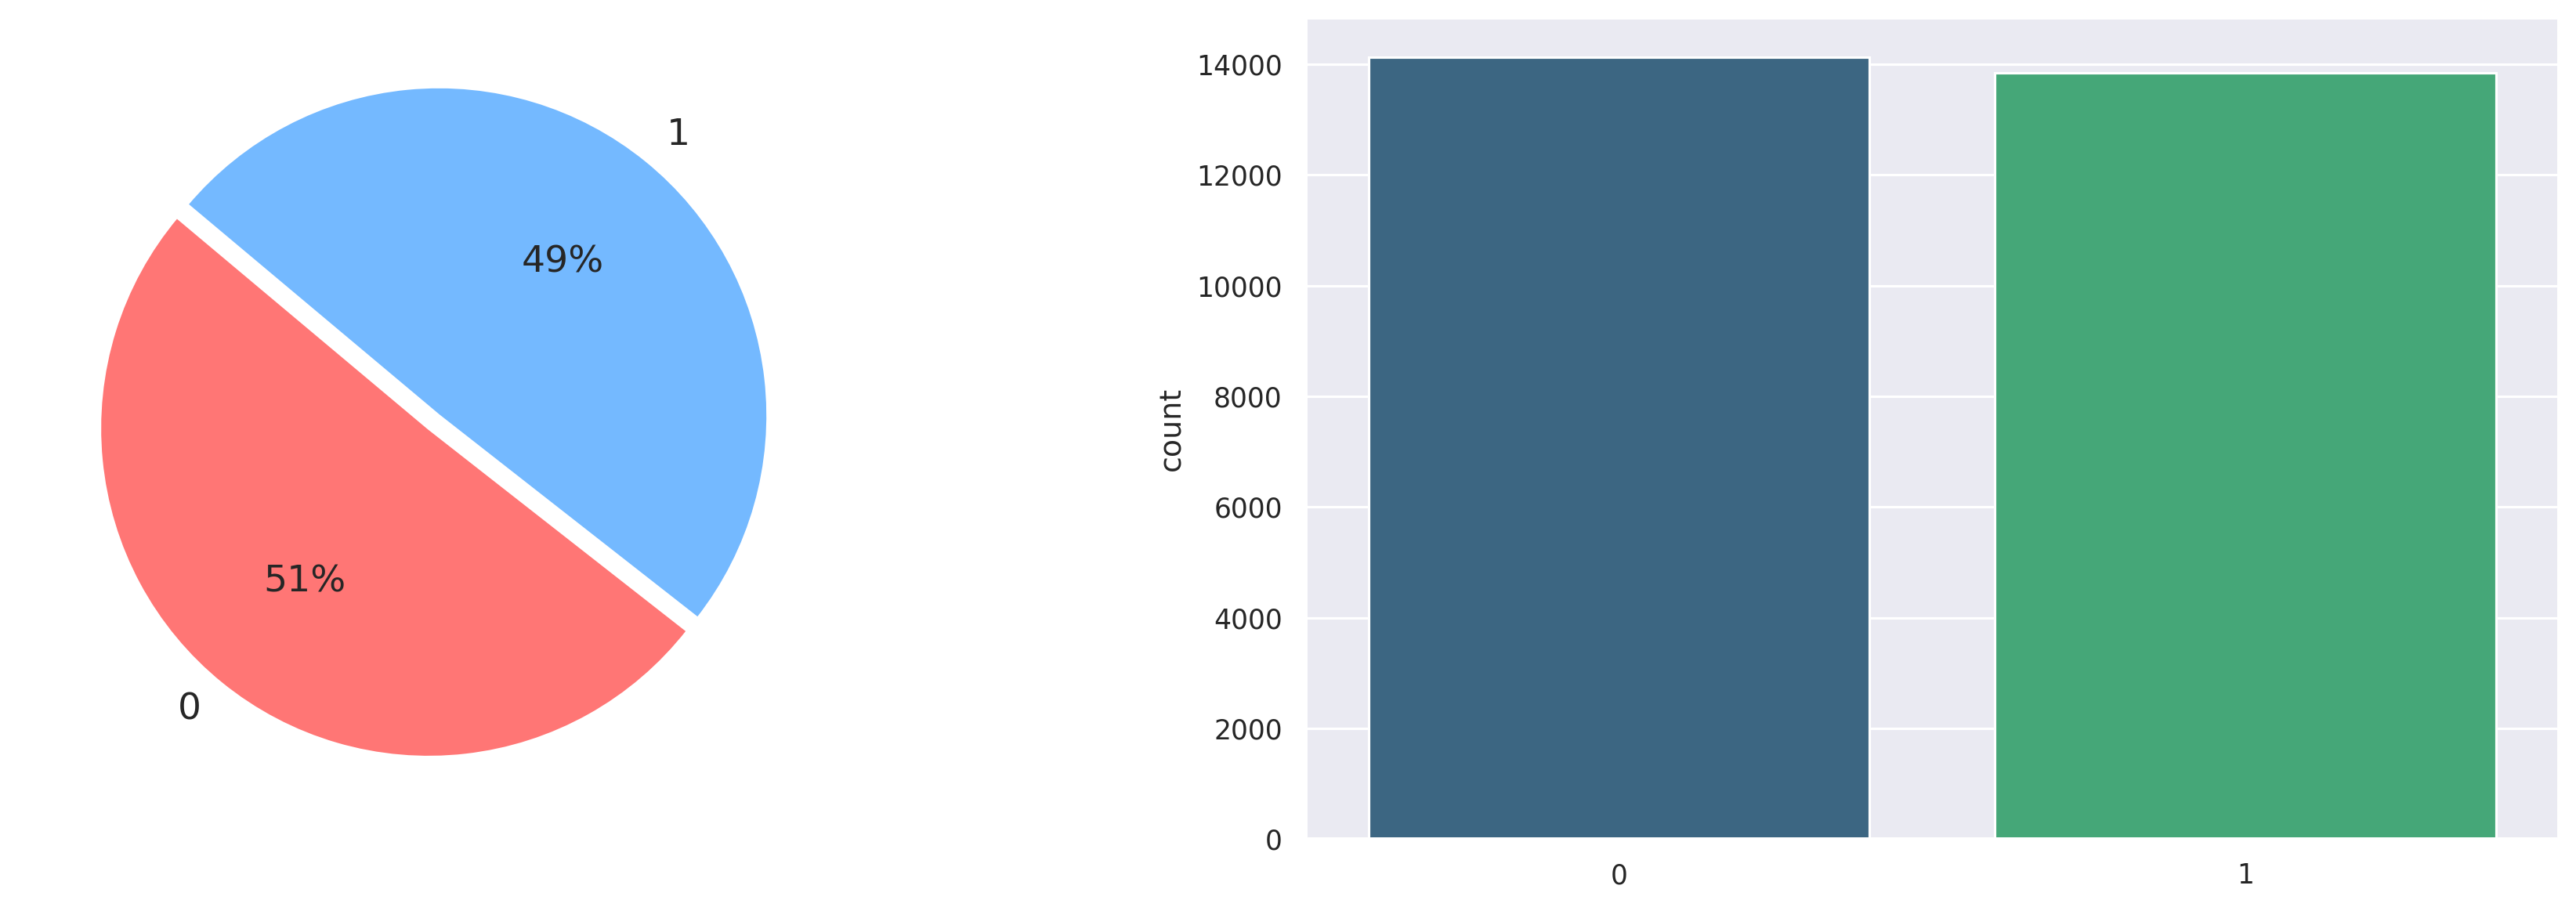

In [11]:
# code by "Spam Classifier | NLP | 98% Accuracy" by ANUBHAV GOYAL( https://www.kaggle.com/code/sasakitetsuya/spam-nlp-98-accuracy )

labels = [0, 1]
sizes = [14139, 13838]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140,
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = data['label'].unique(), y = data['label'].value_counts(), palette= 'viridis')

plt.show()

**6) Creating new columns 'Total Words' and 'Total Chars'**

In [12]:
# code by "Spam Classifier | NLP | 98% Accuracy" by ANUBHAV GOYAL( https://www.kaggle.com/code/sasakitetsuya/spam-nlp-98-accuracy )

data['Total Words'] = data['text_indo'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

data['Total Chars'] = data["text_indo"].apply(count_total_words)

In [13]:
data.describe()

,label,Total Words,Total Chars
count,27972.000000,27972.000000,27972.000000
mean,0.494709,79.356928,492.481088
std,0.499981,113.762281,727.873249
min,0.000000,1.000000,2.000000
25%,0.000000,17.000000,105.000000
50%,0.000000,42.000000,254.000000
75%,1.000000,97.000000,595.000000
max,1.000000,2676.000000,25286.000000


**7) Kdeplot by Total Words**

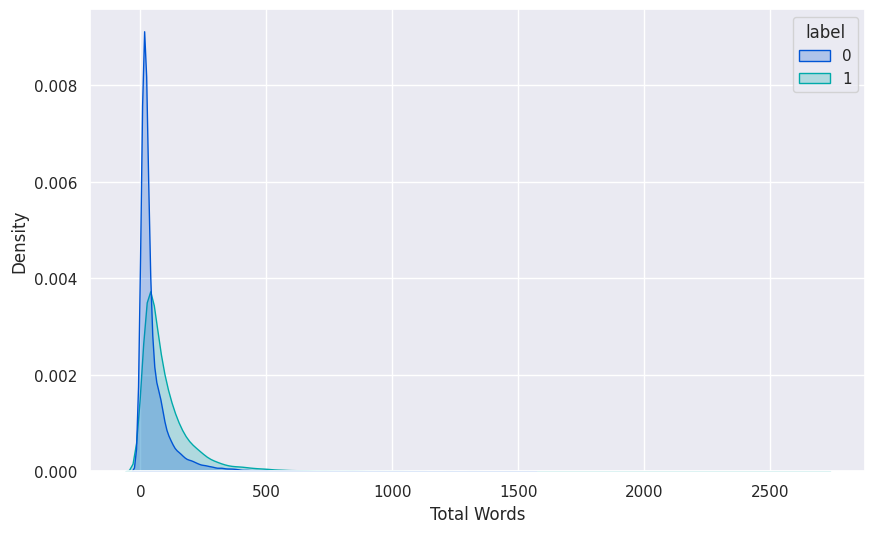

In [14]:
# code by "Spam Classifier | NLP | 98% Accuracy" by ANUBHAV GOYAL( https://www.kaggle.com/code/sasakitetsuya/spam-nlp-98-accuracy )

plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Words'], hue= data['label'], palette= 'winter', shade = True)
plt.show()

**8) Kdeplot by Total Chars**

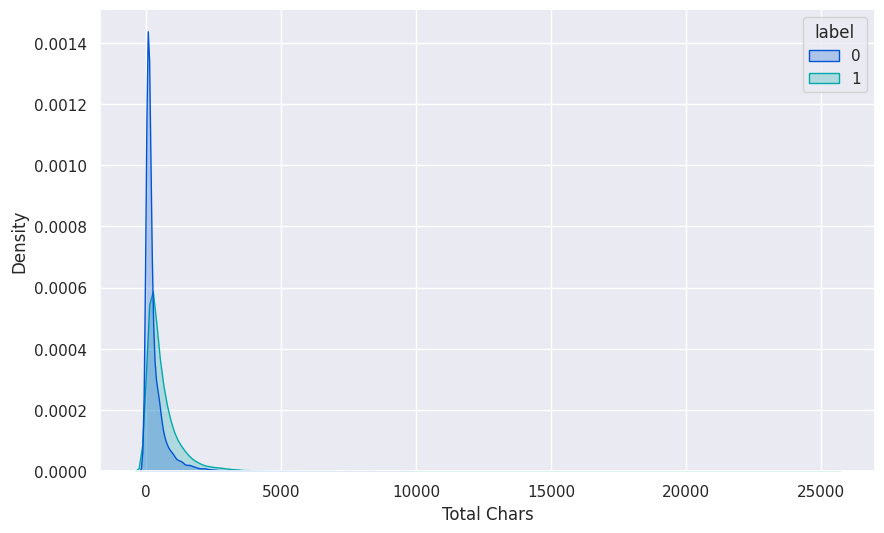

In [15]:
# code by "Spam Classifier | NLP | 98% Accuracy" by ANUBHAV GOYAL( https://www.kaggle.com/code/sasakitetsuya/spam-nlp-98-accuracy )

plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Chars'], hue= data['label'], palette= 'winter', shade = True)
plt.show()

# Text preprocessing

**1) Lowercasing**

In [16]:
# code by "Spam Classifier | NLP | 98% Accuracy" by ANUBHAV GOYAL( https://www.kaggle.com/code/sasakitetsuya/spam-nlp-98-accuracy )

def convert_lowercase(text):
    text = text.lower()
    return text

data['text_indo'] = data['text_indo'].apply(convert_lowercase)

**2) Removing URLs**

In [17]:
# code by "Spam Classifier | NLP | 98% Accuracy" by ANUBHAV GOYAL( https://www.kaggle.com/code/sasakitetsuya/spam-nlp-98-accuracy )
import re
def remove_url(text):
    re_url = re.compile(r'http\S+|www\S+|https\S+')
    return re_url.sub('', text)

data['text_indo'] = data['text_indo'].apply(remove_url)

**3) Removing Punctuations (Tanda Baca)**

In [18]:
# code by "Spam Classifier | NLP | 98% Accuracy" by ANUBHAV GOYAL( https://www.kaggle.com/code/sasakitetsuya/spam-nlp-98-accuracy )

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

data['text_indo'] = data['text_indo'].apply(remove_punc)
data

,text,label,text_indo,Total Words,Total Chars
0,dear american teens question dutch person hear...,0,remaja amerika yang terhormat pertanyaan orang...,27,179
1,nothing look forward lifei dont many reasons k...,1,tak ada harapan hidup tak banyak alasan terus ...,21,115
2,music recommendations im looking expand playli...,0,rekomendasi musik yang saya cari perluas dafta...,73,422
3,im done trying feel betterthe reason im still ...,1,aku sudah selesai mencoba merasa lebih baik al...,109,616
4,worried year old girl subject domestic physic...,1,khawatir gadis berusia tahun subjek fisik ruma...,347,2294
...,...,...,...,...,...
27972,posting everyday people stop caring religion ...,0,memposting setiap hari orang berhenti peduli a...,28,197
27973,okay definetly need hear guys opinion ive pret...,0,oke pasti perlu mendengar pendapat temanteman ...,169,1065
27974,cant get dog think ill kill myselfthe last thi...,1,tidak bisa mendapatkan anjing pikir aku akan b...,33,185
27975,whats point princess bridei really think like ...,1,apa gunanya putri pengantin aku benarbenar ber...,101,660


In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
data['tokens'] = data['text_indo'].astype(str)
data['tokens'] = data['tokens'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
data['tokens'] = data['tokens'].apply(lambda x: [token for token in x if 4 <= len(token) <= 22])
data

,text,label,text_indo,Total Words,Total Chars,tokens
0,dear american teens question dutch person hear...,0,remaja amerika yang terhormat pertanyaan orang...,27,179,"[remaja, amerika, yang, terhormat, pertanyaan,..."
1,nothing look forward lifei dont many reasons k...,1,tak ada harapan hidup tak banyak alasan terus ...,21,115,"[harapan, hidup, banyak, alasan, terus, berjal..."
2,music recommendations im looking expand playli...,0,rekomendasi musik yang saya cari perluas dafta...,73,422,"[rekomendasi, musik, yang, saya, cari, perluas..."
3,im done trying feel betterthe reason im still ...,1,aku sudah selesai mencoba merasa lebih baik al...,109,616,"[sudah, selesai, mencoba, merasa, lebih, baik,..."
4,worried year old girl subject domestic physic...,1,khawatir gadis berusia tahun subjek fisik ruma...,347,2294,"[khawatir, gadis, berusia, tahun, subjek, fisi..."
...,...,...,...,...,...,...
27972,posting everyday people stop caring religion ...,0,memposting setiap hari orang berhenti peduli a...,28,197,"[memposting, setiap, hari, orang, berhenti, pe..."
27973,okay definetly need hear guys opinion ive pret...,0,oke pasti perlu mendengar pendapat temanteman ...,169,1065,"[pasti, perlu, mendengar, pendapat, temanteman..."
27974,cant get dog think ill kill myselfthe last thi...,1,tidak bisa mendapatkan anjing pikir aku akan b...,33,185,"[tidak, bisa, mendapatkan, anjing, pikir, akan..."
27975,whats point princess bridei really think like ...,1,apa gunanya putri pengantin aku benarbenar ber...,101,660,"[gunanya, putri, pengantin, benarbenar, berpik..."


**4) Removing stopwords (kata tidak relevan)**

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('indonesian')

def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

data['tokens'] = data['tokens'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**5) Stemming**

In [22]:
# Stemming
import re

import re
import pandas as pd

# Daftar awalan, akhiran, dan konfiks
suffixes = ['kan', 'nya', 'ku', 'mu', 'tah']
confixes = [('ke', 'an'), ('pe', 'an'), ('ber', 'an'), ('me', 'kan'), ('di', 'kan')]

# Fungsi untuk menghapus akhiran
def remove_suffix(text):
    for suffix in suffixes:
        if text.endswith(suffix):
            return text[:-len(suffix)]
    return text

# Fungsi untuk menghapus konfiks
def remove_confix(text):
    for prefix, suffix in confixes:
        if text.startswith(prefix) and text.endswith(suffix):
            return text[len(prefix):-len(suffix)]
    return text

# Fungsi stemming sederhana
def stem_text_manual(text):
    words = text.split()
    stemmed_words = []
    for word in words:
        word = remove_confix(word)
        word = remove_suffix(word)
        stemmed_words.append(word)
    return ' '.join(stemmed_words)

data['tokens'] = data['tokens'].apply(lambda x: [stem_text_manual(token) for token in x])


# Join the tokens back into a string
data['processed_text'] = data['tokens'].apply(' '.join)

In [23]:
data

,text,label,text_indo,Total Words,Total Chars,tokens,processed_text
0,dear american teens question dutch person hear...,0,remaja amerika yang terhormat pertanyaan orang...,27,179,"[remaja, amerika, terhormat, orang, belanda, m...",remaja amerika terhormat orang belanda mendeng...
1,nothing look forward lifei dont many reasons k...,1,tak ada harapan hidup tak banyak alasan terus ...,21,115,"[harapan, hidup, alasan, jal, jal, esok, hari,...",harapan hidup alasan jal jal esok hari membuat...
2,music recommendations im looking expand playli...,0,rekomendasi musik yang saya cari perluas dafta...,73,422,"[rekomendasi, musik, cari, perluas, daftar, pu...",rekomendasi musik cari perluas daftar putar ge...
3,im done trying feel betterthe reason im still ...,1,aku sudah selesai mencoba merasa lebih baik al...,109,616,"[selesai, mencoba, alasan, hidup, hancur, bunu...",selesai mencoba alasan hidup hancur bunuh meni...
4,worried year old girl subject domestic physic...,1,khawatir gadis berusia tahun subjek fisik ruma...,347,2294,"[khawatir, gadis, berusia, subjek, fisik, ruma...",khawatir gadis berusia subjek fisik rumah tang...
...,...,...,...,...,...,...,...
27972,posting everyday people stop caring religion ...,0,memposting setiap hari orang berhenti peduli a...,28,197,"[memposting, orang, berhenti, peduli, agama, p...",memposting orang berhenti peduli agama pribadi...
27973,okay definetly need hear guys opinion ive pret...,0,oke pasti perlu mendengar pendapat temanteman ...,169,1065,"[mendengar, pendapat, temanteman, cinta, salah...",mendengar pendapat temanteman cinta salah saha...
27974,cant get dog think ill kill myselfthe last thi...,1,tidak bisa mendapatkan anjing pikir aku akan b...,33,185,"[anjing, pikir, bunuh, pegang, aplikasi, berfu...",anjing pikir bunuh pegang aplikasi berfungsi d...
27975,whats point princess bridei really think like ...,1,apa gunanya putri pengantin aku benarbenar ber...,101,660,"[guna, putri, pengantin, benarbenar, berpikir,...",guna putri pengantin benarbenar berpikir wesle...


# Data Visualization

**1) Word Cloud by label '0'**

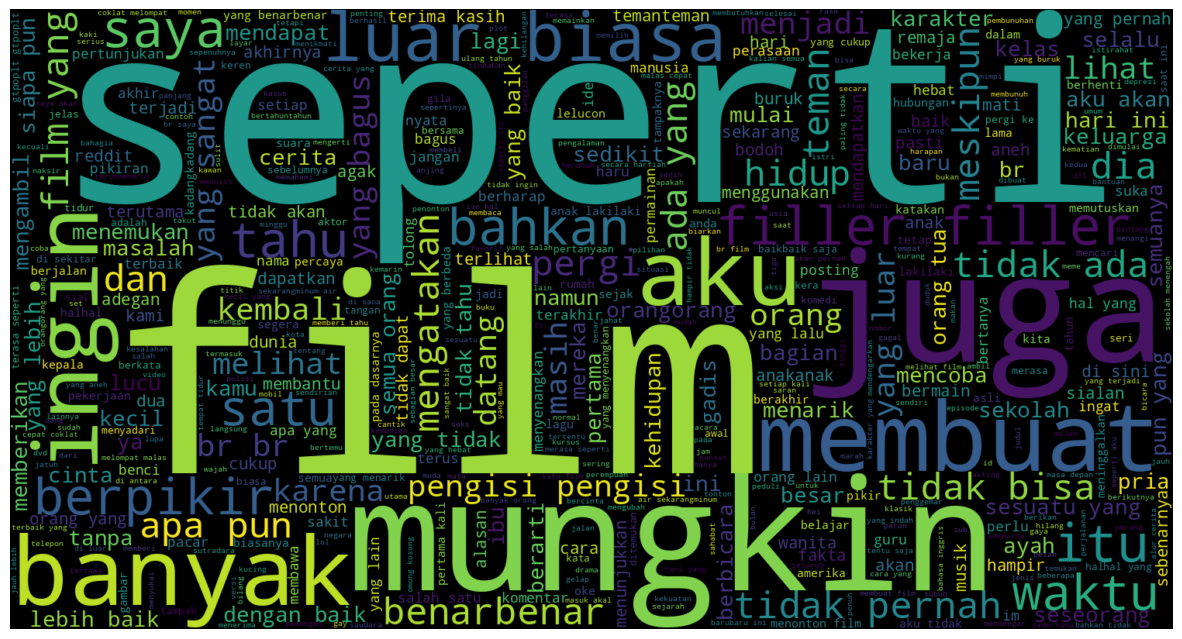

In [ ]:
# code by "Spam Classifier | NLP | 98% Accuracy" by ANUBHAV GOYAL( https://www.kaggle.com/code/sasakitetsuya/spam-nlp-98-accuracy )

text = " ".join(data[data['label'] == 0]['text_indo'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**2) Word Cloud by label '1'**

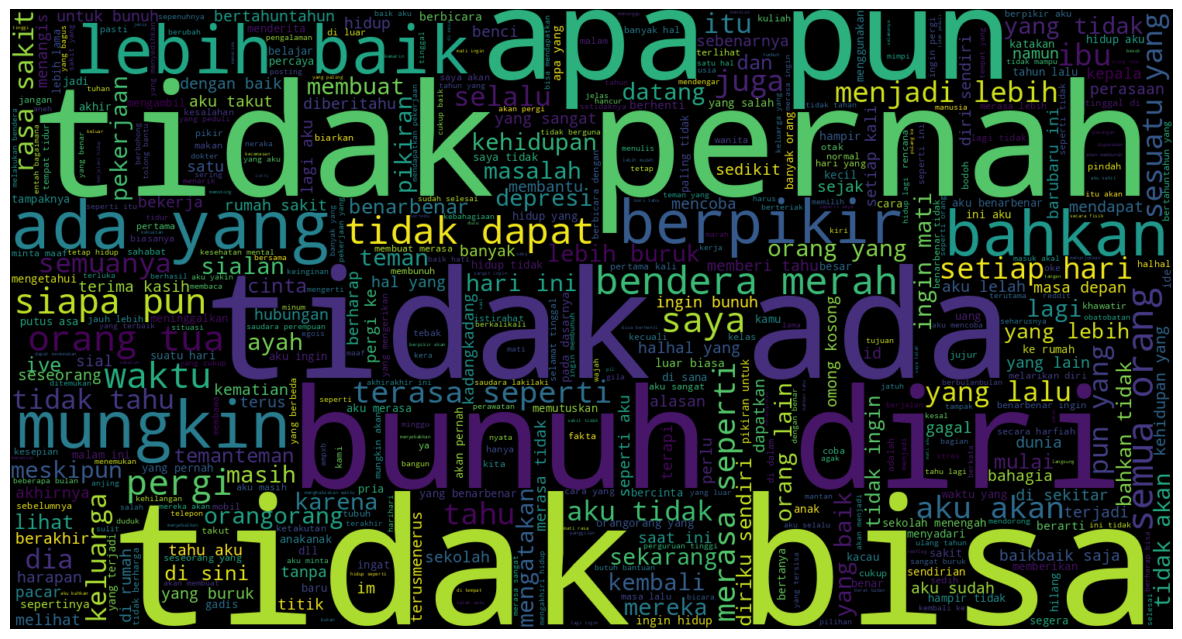

In [ ]:
# code by "Spam Classifier | NLP | 98% Accuracy" by ANUBHAV GOYAL( https://www.kaggle.com/code/sasakitetsuya/spam-nlp-98-accuracy )

text = " ".join(data[data['label'] == 1]['text_indo'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**3) Word Frequency by label '0'**

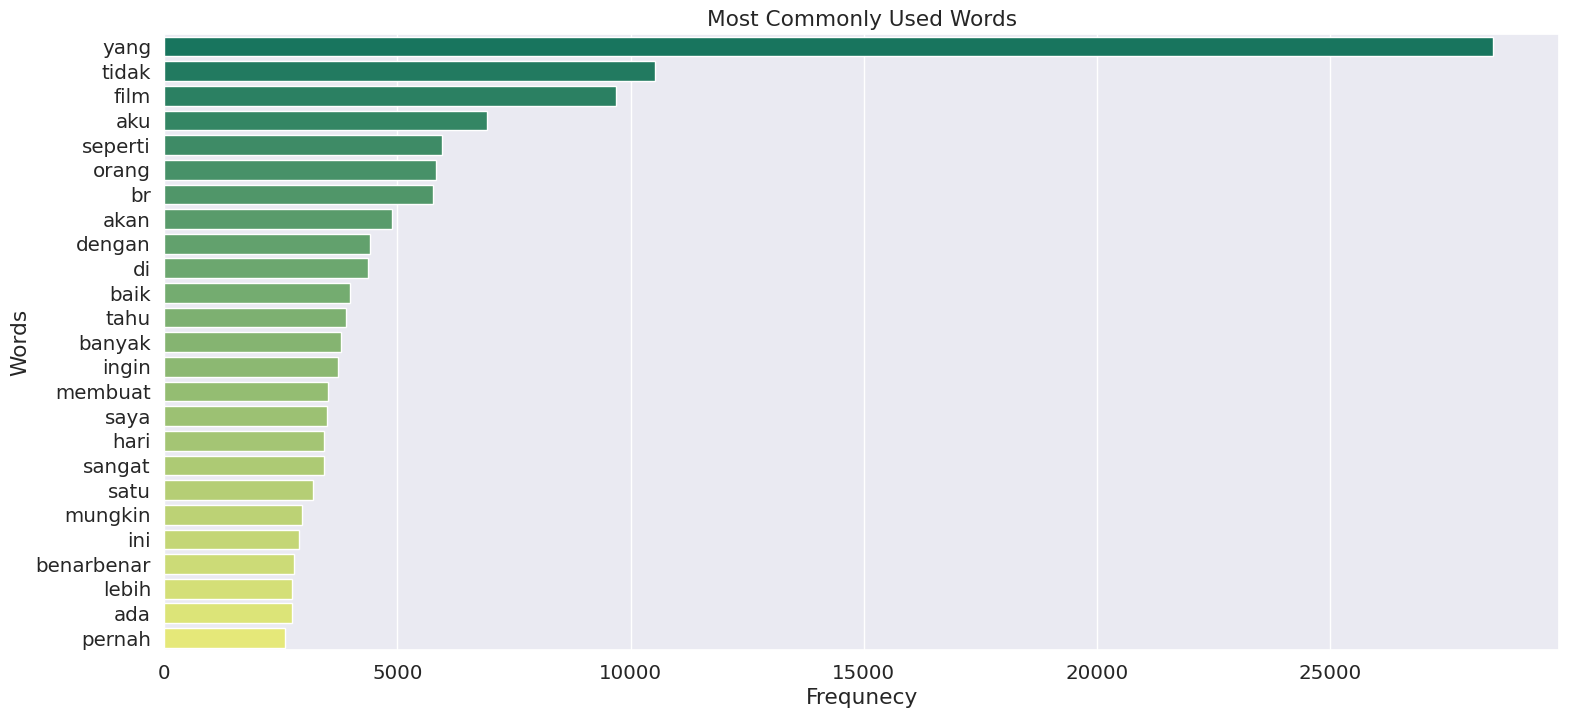

In [ ]:
# code by "Spam Classifier | NLP | 98% Accuracy" by ANUBHAV GOYAL( https://www.kaggle.com/code/sasakitetsuya/spam-nlp-98-accuracy )

all_spam_words = []
for sentence in data[data['label'] == 0]['text_indo'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

**4) Word Frequency by label '1'**

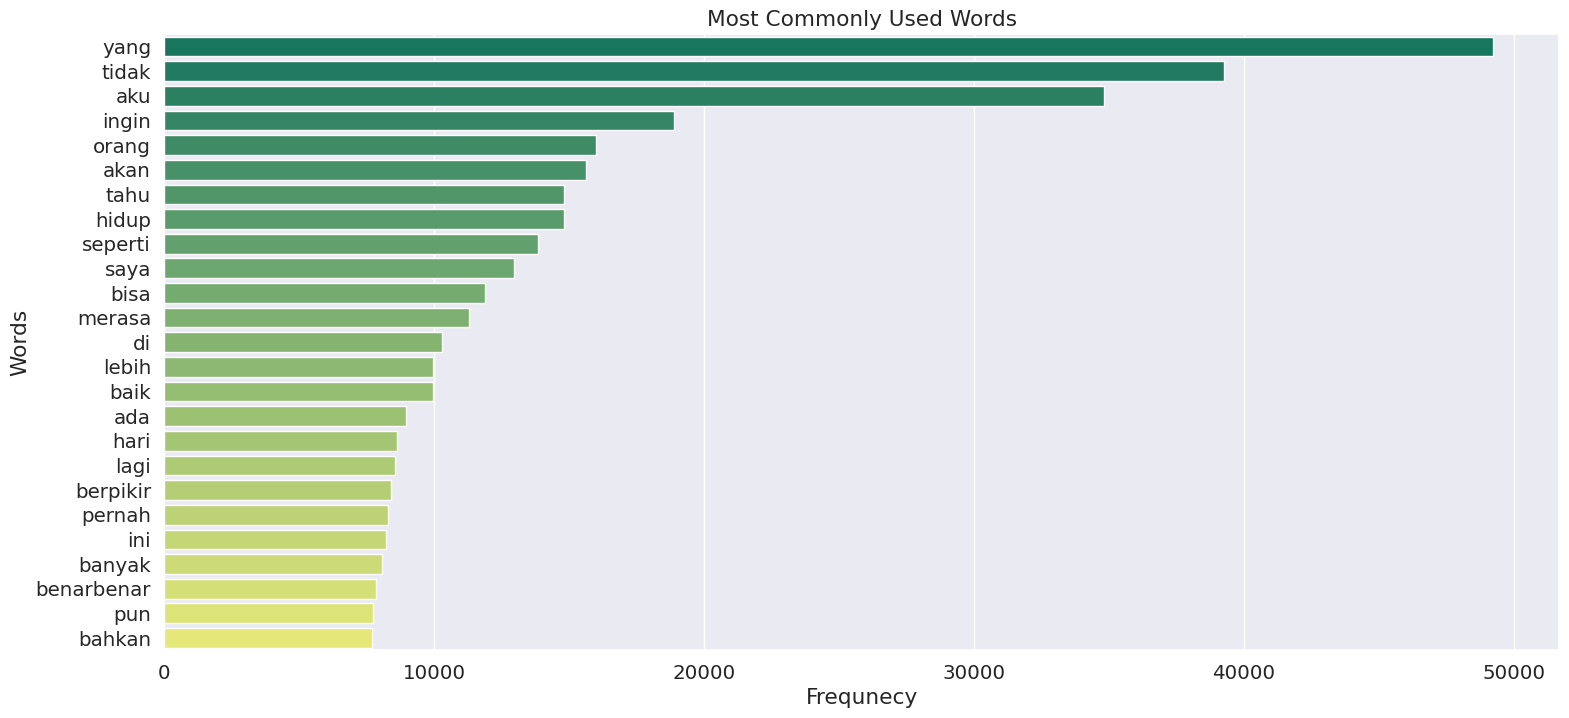

In [ ]:
# code by "Spam Classifier | NLP | 98% Accuracy" by ANUBHAV GOYAL( https://www.kaggle.com/code/sasakitetsuya/spam-nlp-98-accuracy )

all_spam_words = []
for sentence in data[data['label'] == 1]['text_indo'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [24]:
# Hitung jumlah data untuk train dan test
total_data = len(data)
train_size = int(0.8 * total_data)

# Bagi data menjadi train dan test
train_data = data[:train_size]
test_data = data[train_size:]

# Simpan train dan test ke dalam file CSV
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [25]:
import pandas as pd
train_data = pd.read_csv('/content/train_data.csv')

In [26]:
train_data.isna().sum()

text               0
label              0
text_indo          0
Total Words        0
Total Chars        0
tokens             0
processed_text    36
dtype: int64

In [27]:
train_data=train_data.dropna()

In [28]:
# Checking the data types of each column
print(train_data.dtypes)

text              object
label              int64
text_indo         object
Total Words        int64
Total Chars        int64
tokens            object
processed_text    object
dtype: object


In [29]:
# Mengubah kolom processed_text menjadi string
train_data['processed_text'] = train_data['processed_text'].astype('string')

In [45]:
import numpy as np
# Pisahkan fitur (teks) dan label
X = data['processed_text'].values
Y = data['label'].values

# Parameter untuk Tokenizer dan padding
max_words = 10000
max_len = 200

# Tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)

# Mengubah teks menjadi urutan angka
sequences = tokenizer.texts_to_sequences(X)

# Padding sequences untuk panjang yang sama
data_pad = pad_sequences(sequences, maxlen=max_len)

# Pembagian data secara manual
X_train = data_pad[:22381]
Y_train = Y[:22381]
X_test = data_pad[22382:]
Y_test = Y[22382:]

# Konversi label ke numpy array dengan tipe float
Y_train = np.array(Y_train, dtype=float)
Y_test = np.array(Y_test, dtype=float)

# Konversi data input dan output ke tipe data yang benar
X_train = X_train.astype(np.int32)
X_test = X_test.astype(np.int32)
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

# Verifikasi tipe data
print(f"Input data type: {X_train.dtype}, {X_test.dtype}")
print(f"Output data type: {Y_train.dtype}, {Y_test.dtype}")

Input data type: int32, int32
Output data type: float32, float32


from sklearn.feature_extraction.text import TfidfVectorizer# Modeling

In [35]:
# Definisi model
from tensorflow.keras.layers import InputLayer, Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential
import json

import tensorflow as tf
# Definisi model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=16, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()

# Latih model
history = model.fit(X_train, Y_train, epochs=30, batch_size=64, validation_split=0.2)
# Evaluasi model pada data pengujian
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")
# Simpan model dalam format H5
model.save("my_model.h5")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d_3  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160017 (625.07 KB)
Trainable params: 160017 (625.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
280/280 [==============================] - 8s 20ms/step - loss: 0.6617 - accuracy: 0.6241 - val_loss: 0.6251 - val_accuracy: 0.6719
Epoch 2/30
280/280 [==============================] - 4s 14ms/step - 

In [36]:
# Tampilkan ringkasan model setelah training
print("\nModel Summary (Setelah Training):")
model.summary()


Model Summary (Setelah Training):
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d_3  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160017 (625.07 KB)
Trainable params: 160017 (625.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
import tensorflow as tf

# Muat model lengkap dari file H5
loaded_model = tf.keras.models.load_model("my_model.h5")

# Tampilkan ringkasan model yang dimuat
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d_3  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160017 (625.07 KB)
Trainable params: 160017 (625.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# Prediksi dengan model
predictions = model.predict(X_test)
# Konversi probabilitas prediksi menjadi label biner (0 atau 1)
predicted_labels = (predictions > 0.5).astype(int)

# Hitung akurasi keseluruhan
overall_accuracy = np.mean(predicted_labels == Y_test.reshape(-1, 1))
print(f"Overall Accuracy: {overall_accuracy:.4f}")

175/175 [==============================] - 0s 2ms/step
Overall Accuracy: 0.8989


In [44]:
# Output prediksi untuk beberapa contoh
for i in range(len(predicted_labels)):
    print(f"Text: {X_test[i]} - Predicted Probability: {predictions[i][0]:.4f} - Predicted Label: {predicted_labels[i][0]} - Actual Label: {Y_test[i]}")

Output streaming akan dipotong hingga 5000 baris terakhir.
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0   29   39   41
   24   11  262   22   22   62   21 1424 1343  570  401  262  766   49
   29   83   69  163 1077 1386 1184  192  882 4323  159  808   61  102
  132   29   29 1442   91   52  988 2158  338   74  193  683  380   64
  239   56   56  236] - Predicted Probability: 0.9547 - Predicted Label: 1 - Actual Label: 0.0
Text: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

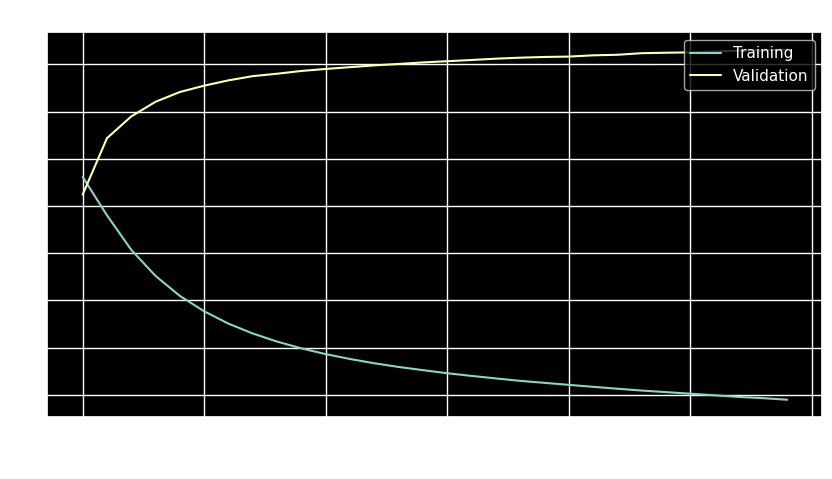

In [40]:
plt.figure(figsize=(10,5))
plt.style.use('dark_background')
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

plt.title('Model loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.show()

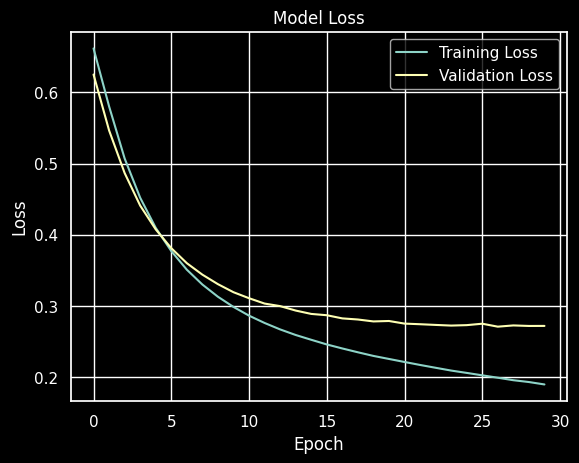

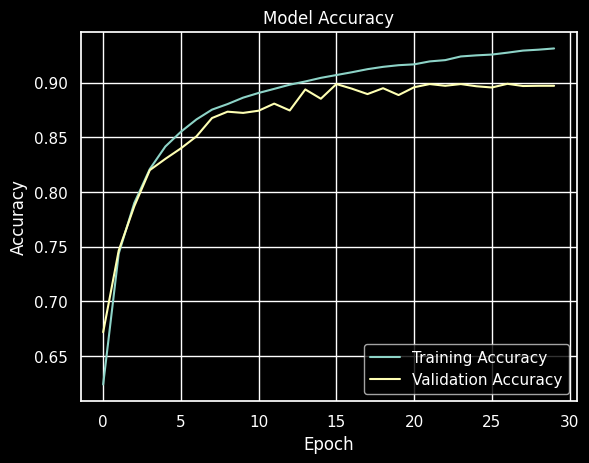

In [41]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [46]:
# Hitung metrik-metrik evaluasi
from sklearn.metrics import classification_report
report = classification_report(Y_test, predicted_labels, target_names=['0', '1'])

# Tampilkan laporan evaluasi
print(report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2822
           1       0.93      0.87      0.89      2768

    accuracy                           0.90      5590
   macro avg       0.90      0.90      0.90      5590
weighted avg       0.90      0.90      0.90      5590



In [47]:
import pickle
# Simpan tokenizer
tokenizer_path = "save_tokenizer.pkl"
with open(tokenizer_path, "wb") as f:
    pickle.dump(tokenizer, f)

# Kemudian, saat Anda memuat kembali tokenizer:
with open(tokenizer_path, "rb") as f:
    tokenizer = pickle.load(f)


In [ ]:
import tensorflow as tf

# Load model
model = tf.keras.models.load_model("my_model.h5")

try:
    # Convert model to TensorFlow Lite format
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.experimental_new_converter = True  # Optional: try with experimental new converter
    tflite_model = converter.convert()

    # Save TensorFlow Lite model to file
    with open('my_model.tflite', 'wb') as f:
        f.write(tflite_model)
    print("TensorFlow Lite model conversion successful.")
except Exception as e:
    print(f"Error converting model to TensorFlow Lite: {e}")



TensorFlow Lite model conversion successful.


In [ ]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from tensorflow.keras.models import load_model
model = load_model("/content/my_model.h5")
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stopword = nltk.corpus.stopwords.words('indonesian')
    tokens = [word for word in tokens if word not in stopword]

    # Stemming
    tokens = [stem_word(token) for token in tokens]

    # Join tokens back to string
    processed_text = ' '.join(tokens)

    return processed_text

# Inisialisasi tokenizer
max_words = 10000
max_len = 200
#tokenizer = Tokenizer(num_words=max_words)

# Definisikan fungsi prediksi kelas
def predict_class(model, tokenizer, text):
    # Memuat kelas label (gantilah dengan kelas label Anda)
    list_labels = ["0", "1"]

    # Tokenisasi teks
    sequences = tokenizer.texts_to_sequences([text])
    print(sequences)
    # Padding sequences untuk panjang yang sama
    data_pad = pad_sequences(sequences, maxlen=max_len)
    # Prediksi dengan model
    prediction = model.predict(data_pad)[0]

    # Ambil indeks kelas dengan probabilitas tertinggi
    predicted_index = np.argmax(prediction)
    # Buat dictionary hasil prediksi
    result = {list_labels[predicted_index]: prediction[predicted_index]}
    return (prediction > 0.5).astype(int)[0],prediction[0]

# Contoh teks yang ingin Anda prediksi
text_to_predict = "saya muak banget stress pikiranya dan pengen coba mati saja"

# Preprocess teks
preprocessed_text = preprocess_text(text_to_predict)

# Prediksi kelas
prediction_result = predict_class(model, tokenizer, preprocessed_text)
print(prediction_result)


[[152, 11]]
1/1 [==============================] - 0s 200ms/step
(0, 0.4717171)


In [ ]:
import numpy as np
import tensorflow as tf
max_len=200
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stopword = nltk.corpus.stopwords.words('indonesian')
    tokens = [word for word in tokens if word not in stopword]

    # Stemming
    tokens = [stem_word(token) for token in tokens]

    # Join tokens back to string
    processed_text = ' '.join(tokens)
    print(processed_text)
    return processed_text
# Load model
interpreter = tf.lite.Interpreter(model_path="/content/my_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
list_labels = list(np.array([0, 1]))
# Define function to predict class
def predict_class(interpreter, tokenizer, text):
    # Tokenize text
    sequences = tokenizer.texts_to_sequences([text])
    data_pad = pad_sequences(sequences, maxlen=max_len)

    # Set input tensor
    input_data = np.array(data_pad, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Extract prediction
    prediction = output_data[0]
    predicted_index = np.argmax(prediction)
    result = {list_labels[predicted_index]: prediction[predicted_index]}
    return (prediction > 0.5).astype(int)[0],prediction[0]

# Example text to predict
text_to_predict = 'stress banget masa muak bunuh diri'

# Preprocess text
preprocessed_text = preprocess_text(text_to_predict)

# Predict class
prediction_result = predict_class(interpreter, tokenizer, preprocessed_text)
print(prediction_result)


stress banget mua bunuh
(1, 0.595029)


In [ ]:
import tensorflow as tf

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="/content/my_model.tflite")
interpreter.allocate_tensors()


In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Example of accessing details
input_shape = input_details[0]['shape']
output_shape = output_details[0]['shape']


In [ ]:
import tensorflow as tf
import json

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="my_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Extract shapes from input and output details
input_shape = input_details[0]['shape']
output_shape = output_details[0]['shape']

# Convert ndarray shapes to lists
input_shape = input_shape.tolist()
output_shape = output_shape.tolist()

# Construct model information dictionary
model_info = {
    "input_shape": input_shape,
    "output_shape": output_shape,
    # Add more details as needed
}

# Convert to JSON
json_model = json.dumps(model_info)

print(json_model)


In [ ]:
import json

# Data JSON yang ingin Anda simpan
model_info = {
    "input_shape": [1, 200],
    "output_shape": [1, 1]
    # Tambahkan lebih banyak detail jika diperlukan
}

# Path tempat Anda ingin menyimpan file JSON
file_path = "my_model_info.json"

# Menyimpan data JSON ke dalam file
with open(file_path, 'w') as json_file:
    json.dump(model_info, json_file)

print(f"File JSON berhasil disimpan di: {file_path}")


In [ ]:
import json

# Path tempat Anda menyimpan file JSON
file_path = "my_model_info.json"

# Membaca data JSON dari file
with open(file_path, 'r') as json_file:
    model_info = json.load(json_file)

# Memeriksa isi metadata
print("Metadata Model TensorFlow Lite:")
print(f"Input Shape: {model_info['input_shape']}")
print(f"Output Shape: {model_info['output_shape']}")
# Tambahkan detail lain jika ada

# Contoh lain: memeriksa keseluruhan JSON
print("\nKeseluruhan Isi JSON:")
print(json.dumps(model_info, indent=4))  # indent=4 untuk menampilkan dengan format indentasi


In [ ]:
import tensorflow as tf

# Load your TensorFlow model
model = tf.keras.models.load_model('/content/my_model.h5')

# Extract metadata
input_shape = model.input.shape.as_list()
output_shape = model.output.shape.as_list()
# Add more metadata as needed

# Example dictionary for metadata
metadata = {
    "input_shape": input_shape,
    "output_shape": output_shape,
    # Add more metadata fields as needed
}


In [ ]:
import json

# Convert metadata to JSON format
metadata_json = json.dumps(metadata, indent=2)  # Use indent for pretty printing

# Save metadata JSON to a file
with open('metadata.json', 'w') as f:
    f.write(metadata_json)

print("Metadata JSON saved to metadata.json")

In [ ]:
import flatbuffers
from tflite_support import metadata_schema_py_generated as metadata_fb

def create_metadata():
    builder = flatbuffers.Builder(0)

    # Set metadata fields (example)
    input_tensor_name = builder.CreateString("input")
    output_tensor_name = builder.CreateString("output")

    metadata_fb.TensorMetadataStart(builder)
    metadata_fb.TensorMetadataAddName(builder, input_tensor_name)
    input_tensor_metadata = metadata_fb.TensorMetadataEnd(builder)

    metadata_fb.TensorMetadataStart(builder)
    metadata_fb.TensorMetadataAddName(builder, output_tensor_name)
    output_tensor_metadata = metadata_fb.TensorMetadataEnd(builder)

    metadata_fb.SubGraphMetadataStartInputTensorMetadataVector(builder, 1)
    builder.PrependUOffsetTRelative(input_tensor_metadata)
    input_metadata_vector = builder.EndVector()

    metadata_fb.SubGraphMetadataStartOutputTensorMetadataVector(builder, 1)
    builder.PrependUOffsetTRelative(output_tensor_metadata)
    output_metadata_vector = builder.EndVector()

    metadata_fb.SubGraphMetadataStart(builder)
    metadata_fb.SubGraphMetadataAddInputTensorMetadata(builder, input_metadata_vector)
    metadata_fb.SubGraphMetadataAddOutputTensorMetadata(builder, output_metadata_vector)
    subgraph_metadata = metadata_fb.SubGraphMetadataEnd(builder)

    metadata_fb.ModelMetadataStartSubgraphMetadataVector(builder, 1)
    builder.PrependUOffsetTRelative(subgraph_metadata)
    subgraph_metadata_vector = builder.EndVector()

    metadata_fb.ModelMetadataStart(builder)
    metadata_fb.ModelMetadataAddSubgraphMetadata(builder, subgraph_metadata_vector)
    model_metadata = metadata_fb.ModelMetadataEnd(builder)

    builder.Finish(model_metadata)
    return builder.Output()

metadata_buf = create_metadata()


In [ ]:
model_path = '/content/my_model.tflite'
model_with_metadata_path = '/content/model_with_metadata aaaa.tflite'

# Read the original model file
with open(model_path, 'rb') as f:
    model_buf = f.read()

# Append metadata to the model buffer
model_with_metadata_buf = bytearray(model_buf)
model_with_metadata_buf.extend(metadata_buf)

# Write the model with metadata to a new file
with open(model_with_metadata_path, 'wb') as f:
    f.write(model_with_metadata_buf)

print(f"Model with metadata saved to {model_with_metadata_path}")

In [ ]:
from tflite_support import metadata as _metadata

def verify_metadata(model_path):
    try:
        with open(model_path, 'rb') as f:
            model_buf = f.read()
    except IOError as e:
        print(f"Error reading model file: {e}")
        return

    # Initialize MetadataDisplayer from model buffer
    displayer = _metadata.MetadataDisplayer.with_model_buffer(model_buf)

    # Get and print metadata as JSON
    model_metadata_json = displayer.get_metadata_json()
    print("Model Metadata JSON:\n", model_metadata_json)

    # Optionally, get associated files
    associated_files = displayer.get_packed_associated_file_list()
    if associated_files:
        print("Associated files:")
        for file_name in associated_files:
            print(" -", file_name)
    else:
        print("No associated files found.")

# Example usage
model_with_metadata_path = 'model_with_metadata aaaa.tflite'
verify_metadata(model_with_metadata_path)

In [ ]:
import os

model_path = '/content/my_model.tflite'
model_with_metadata_path = '/content/model_with_metadata aaaa.tflite'

# Get the size of the original model file
original_size = os.path.getsize(model_path)
print(f"Original model size: {original_size} bytes")

# Get the size of the model file with added metadata
new_size = os.path.getsize(model_with_metadata_path)
print(f"Model with metadata size: {new_size} bytes")

# Compare sizes to verify metadata addition
if new_size > original_size:
    print("Metadata successfully added to TensorFlow Lite model.")
else:
    print("Error: Metadata not added correctly. Check your process.")



In [ ]:
import tensorflow as tf
import numpy as np

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='model_with_metadata aaaa.tflite')
interpreter.allocate_tensors()

# Print input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)


# rafli

In [49]:
!pip install tensorflowjs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
     

In [1]:
!tensorflowjs_converter --input_format=keras '/content/my_model.h5' my_dir

2024-06-20 10:38:13.347266: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 10:38:15.907162: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!pip show tensorflow
!tensorflowjs_converter --input_format=tf_saved_model '/content/content_based_model' '/content/mnist-model

In [ ]:
!pip uninstall -y tflite-support
!pip install tflite-support

In [ ]:
!pip install tflite-support tensorflow

In [ ]:
import os
os._exit(00)

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow=="2.13.0"

In [ ]:
# ==============================================================================
"""Writes metadata and label file to the text classifier models."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

from absl import app
from absl import flags
import flatbuffers
import tensorflow as tf

# pylint: disable=g-direct-tensorflow-import
from tflite_support import metadata_schema_py_generated as _metadata_fb
from tflite_support import metadata as _metadata
# pylint: enable=g-direct-tensorflow-import

FLAGS = flags.FLAGS

def define_flags():
    flags.DEFINE_string("my_model.tflite", None,
                        "/content/my_model.tflite.")
    flags.DEFINE_string("labels.txt", None, "/content/labels.txt")
    flags.DEFINE_string("my_model_with_metadata2", None,
                        "/content/my_model_with_metadata2")
    flags.mark_flag_as_required("my_model.tflite")
    flags.mark_flag_as_required("labels.txt")
    flags.mark_flag_as_required("my_model_with_metadata2")


class ModelSpecificInfo(object):
  """Holds information that is specificly tied to a text classifier."""

  def __init__(self, name, version, num_classes, author):
    self.name = name
    self.version = version
    self.num_classes = num_classes
    self.author = author


_MODEL_INFO = {
    "binary_text_classifier.tflite":
        ModelSpecificInfo(
            name="Binary Text Classifier",
            version="v1",
            num_classes=2,
            author="Mental Glow")
}


class MetadataPopulatorForTextClassifier(object):
  """Populates the metadata for a text classifier."""

  def __init__(self, model_file, model_info, label_file_path):
    self.model_file = model_file
    self.model_info = model_info
    self.label_file_path = label_file_path
    self.metadata_buf = None

  def populate(self):
    """Creates metadata and then populates it for a text classifier."""
    self._create_metadata()
    self._populate_metadata()

  def _create_metadata(self):
    """Creates the metadata for a text classifier."""

    # Creates model info.
    model_meta = _metadata_fb.ModelMetadataT()
    model_meta.name = self.model_info.name
    model_meta.description = ("Binary text classifier that predicts one of two classes.")
    model_meta.version = self.model_info.version
    model_meta.author = self.model_info.author
    model_meta.license = ("Apache License. Version 2.0 "
                          "http://www.apache.org/licenses/LICENSE-2.0.")

    # Creates input info.
    input_meta = _metadata_fb.TensorMetadataT()
    input_meta.name = "input"
    input_meta.description = "Input text to be classified."
    input_meta.content = _metadata_fb.ContentT()
    input_meta.content.contentProperties = _metadata_fb.FeaturePropertiesT()
    input_meta.content.contentPropertiesType = (
        _metadata_fb.ContentProperties.FeatureProperties)

    # Creates output info.
    output_meta = _metadata_fb.TensorMetadataT()
    output_meta.name = "probability"
    output_meta.description = "Probabilities of the two classes respectively."
    output_meta.content = _metadata_fb.ContentT()
    output_meta.content.contentProperties = _metadata_fb.FeaturePropertiesT()
    output_meta.content.contentPropertiesType = (
        _metadata_fb.ContentProperties.FeatureProperties)
    label_file = _metadata_fb.AssociatedFileT()
    label_file.name = os.path.basename(self.label_file_path)
    label_file.description = "Labels for the two classes."
    label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
    output_meta.associatedFiles = [label_file]

    # Creates subgraph info.
    subgraph = _metadata_fb.SubGraphMetadataT()
    subgraph.inputTensorMetadata = [input_meta]
    subgraph.outputTensorMetadata = [output_meta]
    model_meta.subgraphMetadata = [subgraph]

    b = flatbuffers.Builder(0)
    b.Finish(
        model_meta.Pack(b),
        _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
    self.metadata_buf = b.Output()

  def _populate_metadata(self):
    """Populates metadata and label file to the model file."""
    populator = _metadata.MetadataPopulator.with_model_file(self.model_file)
    populator.load_metadata_buffer(self.metadata_buf)
    populator.load_associated_files([self.label_file_path])
    populator.populate()


def main(_):
  model_file = FLAGS.model_file
  model_basename = os.path.basename(model_file)
  if model_basename not in _MODEL_INFO:
    raise ValueError(
        "The model info for, {0}, is not defined yet.".format(model_basename))

  export_model_path = os

In [ ]:
import flatbuffers
from tflite_support import metadata_schema_py_generated as metadata_fb

def create_metadata():
    builder = flatbuffers.Builder(0)

    # Create input tensor metadata
    input_tensor_name = builder.CreateString("input")
    metadata_fb.TensorMetadataStart(builder)
    metadata_fb.TensorMetadataAddName(builder, input_tensor_name)
    input_tensor_metadata = metadata_fb.TensorMetadataEnd(builder)

    # Create output tensor metadata
    output_tensor_name = builder.CreateString("output")
    metadata_fb.TensorMetadataStart(builder)
    metadata_fb.TensorMetadataAddName(builder, output_tensor_name)
    output_tensor_metadata = metadata_fb.TensorMetadataEnd(builder)

    # Create subgraph metadata
    metadata_fb.SubGraphMetadataStartInputTensorMetadataVector(builder, 1)
    builder.PrependUOffsetTRelative(input_tensor_metadata)
    input_metadata_vector = builder.EndVector()

    metadata_fb.SubGraphMetadataStartOutputTensorMetadataVector(builder, 1)
    builder.PrependUOffsetTRelative(output_tensor_metadata)
    output_metadata_vector = builder.EndVector()

    metadata_fb.SubGraphMetadataStart(builder)
    metadata_fb.SubGraphMetadataAddInputTensorMetadata(builder, input_metadata_vector)
    metadata_fb.SubGraphMetadataAddOutputTensorMetadata(builder, output_metadata_vector)
    subgraph_metadata = metadata_fb.SubGraphMetadataEnd(builder)

    # Create model metadata
    metadata_fb.ModelMetadataStartSubgraphMetadataVector(builder, 1)
    builder.PrependUOffsetTRelative(subgraph_metadata)
    subgraph_metadata_vector = builder.EndVector()

    metadata_fb.ModelMetadataStart(builder)
    metadata_fb.ModelMetadataAddSubgraphMetadata(builder, subgraph_metadata_vector)
    model_metadata = metadata_fb.ModelMetadataEnd(builder)

    builder.Finish(model_metadata)
    return builder.Output()

metadata_buf = create_metadata()
model_path = "/content/my_model.tflite"
model_with_metadata_path = "my_model_with_metadata_bisa.tflite"

with open(model_path, 'rb') as f:
    model_buf = f.read()

# Append metadata to the model buffer
model_with_metadata_buf = bytearray(model_buf)
model_with_metadata_buf.extend(metadata_buf)

# Write the model with metadata to a new file
with open(model_with_metadata_path, 'wb') as f:
    f.write(model_with_metadata_buf)

print(f"Model dengan metadata telah disimpan di {model_with_metadata_path}")



In [ ]:
import flatbuffers
from tflite_support import metadata_schema_py_generated as metadata_fb

def read_metadata(model_path):
    # Read model file
    try:
        with open(model_path, 'rb') as f:
            model_buf = f.read()
    except IOError as e:
        print(f"Error reading model file: {e}")
        return

    print(f"Model buffer size: {len(model_buf)} bytes")

    # Check if metadata exists
    try:
        displayer = metadata_fb.MetadataDisplayer.with_model_file(model_path)
        model_metadata_json = displayer.get_metadata_json()
        print("Metadata JSON:\n", model_metadata_json)
    except ValueError as e:
        print(f"Error reading metadata: {e}")
        return
    except Exception as e:
        print(f"Unexpected error occurred: {e}")
        return

# Example usage
model_path = "/content/my_model_with_metadata_bisa.tflite"
read_metadata(model_path)


In [ ]:
import flatbuffers
from tflite_support import metadata_schema_py_generated as metadata_fb

def read_metadata(model_path):
    # Read model file
    try:
        with open(model_path, 'rb') as f:
            model_buf = f.read()
    except IOError as e:
        print(f"Error reading model file: {e}")
        return

    print(f"Model buffer size: {len(model_buf)} bytes")

    # Check if model buffer is valid
    if len(model_buf) < flatbuffers.number_types.Int32Flags.bytewidth:
        print("Model buffer is too small, cannot read metadata.")
        return

    # Get model metadata
    try:
        model_metadata = metadata_fb.ModelMetadata.GetRootAsModelMetadata(model_buf, 0)
    except Exception as e:
        print(f"Error occurred while reading metadata: {e}")
        return

    # Accessing subgraph metadata
    subgraph_count = model_metadata.SubgraphMetadataLength()
    print(f"Number of subgraphs: {subgraph_count}")

    for subgraph_idx in range(subgraph_count):
        subgraph_metadata = model_metadata.SubgraphMetadata(subgraph_idx)
        input_count = subgraph_metadata.InputTensorMetadataLength()
        output_count = subgraph_metadata.OutputTensorMetadataLength()

        print(f"\nSubgraph {subgraph_idx + 1}:")
        print(f"Inputs:")
        for input_idx in range(input_count):
            input_metadata = subgraph_metadata.InputTensorMetadata(input_idx)
            input_name = input_metadata.Name().decode('utf-8')
            input_type = input_metadata.DataType()
            print(f"  - Name: {input_name}, Type: {input_type}")

        print(f"Outputs:")
        for output_idx in range(output_count):
            output_metadata = subgraph_metadata.OutputTensorMetadata(output_idx)
            output_name = output_metadata.Name().decode('utf-8')
            output_type = output_metadata.DataType()
            print(f"  - Name: {output_name}, Type: {output_type}")

# Example usage
model_path = "/content/my_model_with_metadata_bisa.tflite"
read_metadata(model_path)


In [ ]:
!pip install tflite-support

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

from absl import app
from absl import flags
import flatbuffers
import tensorflow as tf

# pylint: disable=g-direct-tensorflow-import
from tflite_support import metadata_schema_py_generated as _metadata_fb
from tflite_support import metadata as _metadata
# pylint: enable=g-direct-tensorflow-import

FLAGS = flags.FLAGS

def define_flags():
    flags.DEFINE_string("my_model.tflite", None,
                        "/content/my_model.tflite")
    flags.DEFINE_string("labels.txt", None,
                        "/content/labels.txt")
    flags.mark_flag_as_required("my_model.tflite")
    flags.mark_flag_as_required("labels.txt")

class ModelSpecificInfo(object):
    """Holds information specific to a text classifier."""

    def __init__(self, name, version, num_classes, author):
        self.name = name
        self.version = version
        self.num_classes = num_classes
        self.author = author

_MODEL_INFO = {
    "binary_text_classifier.tflite":
        ModelSpecificInfo(
            name="Binary Text Classifier",
            version="v1",
            num_classes=2,
            author="Your Name")
}

class MetadataPopulatorForTextClassifier(object):
    """Populates the metadata for a text classifier."""

    def __init__(self, model_file, model_info, label_file_path):
        self.model_file = model_file
        self.model_info = model_info
        self.label_file_path = label_file_path
        self.metadata_buf = None

    def populate(self):
        """Creates metadata and then populates it for a text classifier."""
        self._create_metadata()
        self._populate_metadata()

    def _create_metadata(self):
        """Creates the metadata for a text classifier."""
        model_meta = _metadata_fb.ModelMetadataT()
        model_meta.name = self.model_info.name
        model_meta.description = "Binary text classifier"
        model_meta.version = self.model_info.version
        model_meta.author = self.model_info.author
        model_meta.license = ("Apache License. Version 2.0 "
                              "http://www.apache.org/licenses/LICENSE-2.0.")

        # Create input info
        input_meta = _metadata_fb.TensorMetadataT()
        input_meta.name = "input"
        input_meta.description = "Input text to be classified"
        input_meta.content = _metadata_fb.ContentT()
        input_meta.content.contentProperties = _metadata_fb.FeaturePropertiesT()
        input_meta.content.contentPropertiesType = (
            _metadata_fb.ContentProperties.FeatureProperties)

        # Create output info
        output_meta = _metadata_fb.TensorMetadataT()
        output_meta.name = "output"
        output_meta.description = "Binary classification output"
        output_meta.content = _metadata_fb.ContentT()
        output_meta.content.contentProperties = _metadata_fb.FeaturePropertiesT()
        output_meta.content.contentPropertiesType = (
            _metadata_fb.ContentProperties.FeatureProperties)

        # Associate labels file
        label_file = _metadata_fb.AssociatedFileT()
        label_file.name = os.path.basename(self.label_file_path)
        label_file.description = "Labels for binary classification"
        label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
        output_meta.associatedFiles = [label_file]

        # Create subgraph info
        subgraph = _metadata_fb.SubGraphMetadataT()
        subgraph.inputTensorMetadata = [input_meta]
        subgraph.outputTensorMetadata = [output_meta]
        model_meta.subgraphMetadata = [subgraph]

        # Finish and set the metadata buffer
        b = flatbuffers.Builder(0)
        b.Finish(
            model_meta.Pack(b),
            _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
        self.metadata_buf = b.Output()

    def _populate_metadata(self):
        """Populates metadata and label file to the model file."""
        populator = _metadata.MetadataPopulator.with_model_file(self.model_file)
        populator.load_metadata_buffer(self.metadata_buf)
        populator.load_associated_files([self.label_file_path])
        populator.populate()

def main(_):
    try:
        # Ensure export directory exists.
        if not tf.io.gfile.exists(FLAGS.export_directory):
            tf.io.gfile.makedirs(FLAGS.export_directory)

        # Generate the metadata objects and put them in the model file
        model_basename = os.path.basename(FLAGS.model_file)
        if model_basename not in _MODEL_INFO:
            raise ValueError(f"The model info for {model_basename} is not defined yet.")

        export_model_path = os.path.join(FLAGS.export_directory, model_basename)
        tf.io.gfile.copy(FLAGS.model_file, export_model_path, overwrite=False)

        populator = MetadataPopulatorForTextClassifier(
            export_model_path, _MODEL_INFO[model_basename], FLAGS.labels_file)
        populator.populate()

        # Validate the output model file by reading the metadata and produce
        # a json file with the metadata under the export path
        displayer = _metadata.MetadataDisplayer.with_model_file(export_model_path)
        export_json_file = os.path.join(FLAGS.export_directory,
                                        os.path.splitext(model_basename)[0] + ".json")
        json_file = displayer.get_metadata_json()
        with open(export_json_file, "w") as f:
            f.write(json_file)

        print("Finished populating metadata and associated file to the model:")
        print(FLAGS.model_file)
        print("The metadata json file has been saved to:")
        print(export_json_file)
        print("The associated file that has been packed to the model is:")
        print(displayer.get_packed_associated_file_list())

    except Exception as e:
        print(f"Error in main function: {e}")

if __name__ == "__main__":
    define_flags()
    try:
        app.run(main)
    except SystemExit as e:
        print(f"Error during execution: {e}")

In [ ]:
import flatbuffers
from tflite_support.metadata_writers import metadata_info

def create_metadata():
    # Buat metadata untuk input dan output
    input_meta = metadata_info.TensorMetadata()
    input_meta.name = "input"
    input_meta.description = "Input image to be classified"
    input_meta.content = metadata_info.Content(
        content_properties=metadata_info.ImageProperties(),
        stats=metadata_info.Stats()
    )

    output_meta = metadata_info.TensorMetadata()
    output_meta.name = "output"
    output_meta.description = "Classification results"
    output_meta.content = metadata_info.Content(
        content_properties=metadata_info.FeatureProperties(),
        stats=metadata_info.Stats()
    )

    # Buat writer untuk model
    model_meta = metadata_info.ModelMetadata()
    model_meta.name = "Image Classification Model"
    model_meta.description = "Model to classify images"
    model_meta.input_tensor_metadata = [input_meta]
    model_meta.output_tensor_metadata = [output_meta]

    return model_meta

# Path model TensorFlow Lite Anda
model_path = "/content/my_model pliss bisa 2.tflite"
model_with_metadata_path = "/content/my_model_with_metadata.tflite"

# Membuat metadata
model_metadata = create_metadata()

# Menulis metadata ke model
writer = metadata_writer.MetadataWriter.create_from_file(
    writer_utils.load_file(model_path),
    model_metadata
)
writer_utils.save_file(writer.populate(), model_with_metadata_path)

print(f"Model dengan metadata telah disimpan di {model_with_metadata_path}")


In [ ]:
from tensorflow.keras.layers import InputLayer, Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential
import json

# Definisikan model
model = Sequential([
    InputLayer(input_shape=(200,)),
    Embedding(input_dim=1000, output_dim=16),
    GlobalAveragePooling1D(),
    Dense(units=1, activation='sigmoid')
])

# Konversi arsitektur model ke JSON
model_json = model.to_json()

# Simpan JSON ke file
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

print("Model architecture has been saved to model_architecture.json")


In [ ]:
import json
import tensorflow as tf
from pprint import pprint

# Load the model architecture from JSON
with open("/content/model_architecture.json", "r") as json_file:
    loaded_model_json = json_file.read()

# Load the model architecture from the JSON string
loaded_model_json = json.loads(loaded_model_json)

# Extract the config sub-dictionary
config = loaded_model_json['config']

# Create a new Sequential model
loaded_model = tf.keras.Sequential.from_config(config)

# Compile the model
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the loaded model
loaded_model.summary()

# Optionally, pretty-print the loaded model architecture JSON
pprint(loaded_model_json, indent=4)

In [ ]:
print(loaded_model_json.keys())

In [ ]:
config = loaded_model_json.get('config', {})
config

In [ ]:
if 'config' in loaded_model_json:
    config = loaded_model_json['config']
else:
    print("The 'config' key does not exist in the loaded model JSON.")